# Multilayer Perceptron (MLP):

In deep learning, a multilayer perceptron (MLP) is a name for a modern feedforward neural network consisting of fully connected neurons with nonlinear activation functions, organized in layers, notable for being able to distinguish data that is not linearly separable.

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8], len(words)

(['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia'],
 32033)

In [3]:
# build the vocabulary of characters and mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi= {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos={i:s for s, i in stoi.items()}

In [79]:
# build the dataset
%time
### My way ###
block_size =3
X,Y=[],[]  # X and Y have to be the list of numbers since after that we wanna make tensors
for w in words[:3]:
    chars = block_size * ['.']+list(w)+['.']
    #print(chars)
    print(w)
    for i in range(len(w)+1):
        xi = chars[i:block_size+i]
        yi = chars[block_size+i]
        print(f'{xi} ---> {yi}')
        y_i = stoi[yi]
        r =[]
        for j in xi:
            r.append(stoi[j])
        print(f'{r} --> {y_i}')
        
        X.append(r)
        
        Y.append(y_i)
    print(f'{X}--->{Y}')

X = torch.tensor(X)
Y = torch.tensor(Y)

CPU times: user 7 μs, sys: 2 μs, total: 9 μs
Wall time: 25 μs
emma
['.', '.', '.'] ---> e
[0, 0, 0] --> 5
['.', '.', 'e'] ---> m
[0, 0, 5] --> 13
['.', 'e', 'm'] ---> m
[0, 5, 13] --> 13
['e', 'm', 'm'] ---> a
[5, 13, 13] --> 1
['m', 'm', 'a'] ---> .
[13, 13, 1] --> 0
[[0, 0, 0], [0, 0, 5], [0, 5, 13], [5, 13, 13], [13, 13, 1]]--->[5, 13, 13, 1, 0]
olivia
['.', '.', '.'] ---> o
[0, 0, 0] --> 15
['.', '.', 'o'] ---> l
[0, 0, 15] --> 12
['.', 'o', 'l'] ---> i
[0, 15, 12] --> 9
['o', 'l', 'i'] ---> v
[15, 12, 9] --> 22
['l', 'i', 'v'] ---> i
[12, 9, 22] --> 9
['i', 'v', 'i'] ---> a
[9, 22, 9] --> 1
['v', 'i', 'a'] ---> .
[22, 9, 1] --> 0
[[0, 0, 0], [0, 0, 5], [0, 5, 13], [5, 13, 13], [13, 13, 1], [0, 0, 0], [0, 0, 15], [0, 15, 12], [15, 12, 9], [12, 9, 22], [9, 22, 9], [22, 9, 1]]--->[5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1, 0]
ava
['.', '.', '.'] ---> a
[0, 0, 0] --> 1
['.', '.', 'a'] ---> v
[0, 0, 1] --> 22
['.', 'a', 'v'] ---> a
[0, 1, 22] --> 1
['a', 'v', 'a'] ---> .
[1, 22, 1] --> 0
[[

In [76]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1]])

In [77]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0])

In [4]:
%time
block_size =3
X,Y=[],[]
for w in words[:5]:
    print(w)
    context = [0]* block_size
    for ch in w + '.':
        ix= stoi[ch]
        X.append(context)
    #print(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:]+[ix] #crop and append
X = torch.tensor(X)
Y = torch.tensor(Y)

CPU times: user 6 μs, sys: 1 μs, total: 7 μs
Wall time: 14.8 μs
emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [5]:
X, X.dtype , X.shape

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13],
         [ 5, 13, 13],
         [13, 13,  1],
         [ 0,  0,  0],
         [ 0,  0, 15],
         [ 0, 15, 12],
         [15, 12,  9],
         [12,  9, 22],
         [ 9, 22,  9],
         [22,  9,  1],
         [ 0,  0,  0],
         [ 0,  0,  1],
         [ 0,  1, 22],
         [ 1, 22,  1],
         [ 0,  0,  0],
         [ 0,  0,  9],
         [ 0,  9, 19],
         [ 9, 19,  1],
         [19,  1,  2],
         [ 1,  2,  5],
         [ 2,  5, 12],
         [ 5, 12, 12],
         [12, 12,  1],
         [ 0,  0,  0],
         [ 0,  0, 19],
         [ 0, 19, 15],
         [19, 15, 16],
         [15, 16,  8],
         [16,  8,  9],
         [ 8,  9,  1]]),
 torch.int64,
 torch.Size([32, 3]))

In [6]:
Y, Y.dtype, Y.shape

(tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]),
 torch.int64,
 torch.Size([32]))

* based on the article, we take `C` and we wanna embbed the 27 letters to the lower dimentional space for example here we take m=2 and C is a matrix with 27 rows and 2 columns. That is we are embedding each characters to the 2-dimentional character.

In [7]:
C = torch.randn((27,2))
C # embedding matrix

tensor([[-0.6793,  0.6861],
        [-2.0476, -2.1244],
        [ 0.8056, -0.5502],
        [ 0.1493,  0.6482],
        [-0.5250, -0.0724],
        [-0.0310, -1.2387],
        [ 0.0038, -0.1316],
        [-0.8352, -0.4425],
        [ 0.4592, -0.6036],
        [ 0.8021, -0.7980],
        [-1.7961, -0.7690],
        [-0.5497,  1.3861],
        [ 0.7028, -1.6860],
        [ 0.9204,  1.2696],
        [-0.4535, -0.5162],
        [ 0.3391, -0.8855],
        [ 1.1460,  0.0295],
        [ 0.5651, -0.3956],
        [-0.6595, -0.7429],
        [-0.3807,  0.1481],
        [ 1.8106,  0.5667],
        [ 0.2601,  0.4391],
        [-1.3093, -0.6449],
        [ 1.4310,  0.0408],
        [-0.0223, -0.9382],
        [ 0.8320,  0.3891],
        [-0.3001,  0.5168]])

In [8]:
C[5] # tensor([5]) is embedded to tensor([-0.6290,  1.7676]) # indexing the 5th row

tensor([-0.0310, -1.2387])

In [9]:
C[5].shape # indexing

torch.Size([2])

In [10]:
F.one_hot(torch.tensor(5), num_classes=27) # another way to show `5` by one_hot code that  we had in the previous lecture

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [11]:
F.one_hot(torch.tensor(5), num_classes=27).dtype 

torch.int64

**dtype of `F.one_hot(torch.tensor(5), num_classes=27)` is torch.int64 or Long.**

**PyTorch does not know how to multiply the int to float so we need to cast the F.one_hot(torch.tensor(5), num_classes=27) into the `float`.**

In [12]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.0310, -1.2387])

In [13]:
C[[5,6,7]], C[[5,6,7]].shape # we can indexing by the list # we have the slice of C, # 5th,6th,7th rows

(tensor([[-0.0310, -1.2387],
         [ 0.0038, -0.1316],
         [-0.8352, -0.4425]]),
 torch.Size([3, 2]))

In [14]:
C[5], C[6], C[7] # 5th,6th,7th rows

(tensor([-0.0310, -1.2387]),
 tensor([ 0.0038, -0.1316]),
 tensor([-0.8352, -0.4425]))

In [15]:
C[torch.tensor([5,6,7])] # 5th,6th,7th rows # we can index by the list of integers too

tensor([[-0.0310, -1.2387],
        [ 0.0038, -0.1316],
        [-0.8352, -0.4425]])

In [16]:
C[torch.tensor([5,6,7,7,7])] # 7th row is repeated

tensor([[-0.0310, -1.2387],
        [ 0.0038, -0.1316],
        [-0.8352, -0.4425],
        [-0.8352, -0.4425],
        [-0.8352, -0.4425]])

In [17]:
C[torch.tensor([[5,6,7]])]

tensor([[[-0.0310, -1.2387],
         [ 0.0038, -0.1316],
         [-0.8352, -0.4425]]])

In [18]:
X[0:5]

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1]])

In [19]:
C[X[0:5]], C[X[0:5]].shape # embedding for first word, 

(tensor([[[-0.6793,  0.6861],
          [-0.6793,  0.6861],
          [-0.6793,  0.6861]],
 
         [[-0.6793,  0.6861],
          [-0.6793,  0.6861],
          [-0.0310, -1.2387]],
 
         [[-0.6793,  0.6861],
          [-0.0310, -1.2387],
          [ 0.9204,  1.2696]],
 
         [[-0.0310, -1.2387],
          [ 0.9204,  1.2696],
          [ 0.9204,  1.2696]],
 
         [[ 0.9204,  1.2696],
          [ 0.9204,  1.2696],
          [-2.0476, -2.1244]]]),
 torch.Size([5, 3, 2]))

In [20]:
C[X[0:16]], C[X[0:16]].shape # embedding for first three words, 

(tensor([[[-0.6793,  0.6861],
          [-0.6793,  0.6861],
          [-0.6793,  0.6861]],
 
         [[-0.6793,  0.6861],
          [-0.6793,  0.6861],
          [-0.0310, -1.2387]],
 
         [[-0.6793,  0.6861],
          [-0.0310, -1.2387],
          [ 0.9204,  1.2696]],
 
         [[-0.0310, -1.2387],
          [ 0.9204,  1.2696],
          [ 0.9204,  1.2696]],
 
         [[ 0.9204,  1.2696],
          [ 0.9204,  1.2696],
          [-2.0476, -2.1244]],
 
         [[-0.6793,  0.6861],
          [-0.6793,  0.6861],
          [-0.6793,  0.6861]],
 
         [[-0.6793,  0.6861],
          [-0.6793,  0.6861],
          [ 0.3391, -0.8855]],
 
         [[-0.6793,  0.6861],
          [ 0.3391, -0.8855],
          [ 0.7028, -1.6860]],
 
         [[ 0.3391, -0.8855],
          [ 0.7028, -1.6860],
          [ 0.8021, -0.7980]],
 
         [[ 0.7028, -1.6860],
          [ 0.8021, -0.7980],
          [-1.3093, -0.6449]],
 
         [[ 0.8021, -0.7980],
          [-1.3093, -0.6449],
          

In [21]:
C[X]

tensor([[[-0.6793,  0.6861],
         [-0.6793,  0.6861],
         [-0.6793,  0.6861]],

        [[-0.6793,  0.6861],
         [-0.6793,  0.6861],
         [-0.0310, -1.2387]],

        [[-0.6793,  0.6861],
         [-0.0310, -1.2387],
         [ 0.9204,  1.2696]],

        [[-0.0310, -1.2387],
         [ 0.9204,  1.2696],
         [ 0.9204,  1.2696]],

        [[ 0.9204,  1.2696],
         [ 0.9204,  1.2696],
         [-2.0476, -2.1244]],

        [[-0.6793,  0.6861],
         [-0.6793,  0.6861],
         [-0.6793,  0.6861]],

        [[-0.6793,  0.6861],
         [-0.6793,  0.6861],
         [ 0.3391, -0.8855]],

        [[-0.6793,  0.6861],
         [ 0.3391, -0.8855],
         [ 0.7028, -1.6860]],

        [[ 0.3391, -0.8855],
         [ 0.7028, -1.6860],
         [ 0.8021, -0.7980]],

        [[ 0.7028, -1.6860],
         [ 0.8021, -0.7980],
         [-1.3093, -0.6449]],

        [[ 0.8021, -0.7980],
         [-1.3093, -0.6449],
         [ 0.8021, -0.7980]],

        [[-1.3093, -0

In [22]:
C[X].shape # for every (32,3) metrix we're retriving 2 embeddings

torch.Size([32, 3, 2])

In [23]:
X[8]

tensor([15, 12,  9])

In [24]:
X[8][2]

tensor(9)

In [25]:
C[[15,12,9]] == C[X[8]]

tensor([[True, True],
        [True, True],
        [True, True]])

In [26]:
C[X[8]]

tensor([[ 0.3391, -0.8855],
        [ 0.7028, -1.6860],
        [ 0.8021, -0.7980]])

In [27]:
C[X][8]

tensor([[ 0.3391, -0.8855],
        [ 0.7028, -1.6860],
        [ 0.8021, -0.7980]])

In [28]:
C[X[8][2]]

tensor([ 0.8021, -0.7980])

In [29]:
C[X][8,2]

tensor([ 0.8021, -0.7980])

In [30]:
C[X][8][2]

tensor([ 0.8021, -0.7980])

In [31]:
C[9]

tensor([ 0.8021, -0.7980])

In [35]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

### * emb @ W1 +b1

* we wanna make hidden layers now:
  - we have two dimentions embeddings and here we use the three words, so the input of the hidden layer is 6!
  - the number of nurons in this layer is up to us, here we consider 100.
  - 

------------
**Example:**

In [42]:
c=torch.tensor([
               [[1,2,12,121],
                [4,5,15,151]],
    
                [[10,20,100,1000],
                [40,50,200,2000]],
               
                [[11,21,31,310],
                [41,51,71,710]],
                        ])
c

tensor([[[   1,    2,   12,  121],
         [   4,    5,   15,  151]],

        [[  10,   20,  100, 1000],
         [  40,   50,  200, 2000]],

        [[  11,   21,   31,  310],
         [  41,   51,   71,  710]]])

In [43]:
c.shape

torch.Size([3, 2, 4])

In [44]:
c[0]

tensor([[  1,   2,  12, 121],
        [  4,   5,  15, 151]])

In [45]:
c[0,0]

tensor([  1,   2,  12, 121])

In [53]:
c[0,0,0]

tensor(1)

In [48]:
c[:2]

tensor([[[   1,    2,   12,  121],
         [   4,    5,   15,  151]],

        [[  10,   20,  100, 1000],
         [  40,   50,  200, 2000]]])

In [56]:
c[:2, 0:2, :3]

tensor([[[  1,   2,  12],
         [  4,   5,  15]],

        [[ 10,  20, 100],
         [ 40,  50, 200]]])

In [57]:
c[:,0,:]

tensor([[   1,    2,   12,  121],
        [  10,   20,  100, 1000],
        [  11,   21,   31,  310]])

In [60]:
c.shape

torch.Size([3, 2, 4])

In [71]:
c

tensor([[[   1,    2,   12,  121],
         [   4,    5,   15,  151]],

        [[  10,   20,  100, 1000],
         [  40,   50,  200, 2000]],

        [[  11,   21,   31,  310],
         [  41,   51,   71,  710]]])

In [67]:
torch.unbind(c, dim=0) # eject the matrices from the list! # 3 elements

(tensor([[  1,   2,  12, 121],
         [  4,   5,  15, 151]]),
 tensor([[  10,   20,  100, 1000],
         [  40,   50,  200, 2000]]),
 tensor([[ 11,  21,  31, 310],
         [ 41,  51,  71, 710]]))

In [68]:
torch.unbind(c, dim=1) # 2 elements

(tensor([[   1,    2,   12,  121],
         [  10,   20,  100, 1000],
         [  11,   21,   31,  310]]),
 tensor([[   4,    5,   15,  151],
         [  40,   50,  200, 2000],
         [  41,   51,   71,  710]]))

In [69]:
torch.unbind(c, dim=2) # 4 elements

(tensor([[ 1,  4],
         [10, 40],
         [11, 41]]),
 tensor([[ 2,  5],
         [20, 50],
         [21, 51]]),
 tensor([[ 12,  15],
         [100, 200],
         [ 31,  71]]),
 tensor([[ 121,  151],
         [1000, 2000],
         [ 310,  710]]))

In [82]:
c.storage()

 1
 2
 12
 121
 4
 5
 15
 151
 10
 20
 100
 1000
 40
 50
 200
 2000
 11
 21
 31
 310
 41
 51
 71
 710
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 24]

------------

In [34]:
W1= torch.randn((6,100)) # 100 is the arbitrary number of neurons
b1 = torch.randn(100)

In [59]:
# concatenating:
%time
torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1), torch.cat([emb[:,0,:], emb[:,1,:], emb[:,2,:]],1).shape

CPU times: user 5 μs, sys: 1 μs, total: 6 μs
Wall time: 15 μs


(tensor([[ 1.6220, -0.5737,  1.6220, -0.5737,  1.6220, -0.5737],
         [ 1.6220, -0.5737,  1.6220, -0.5737, -0.0881,  0.7611],
         [ 1.6220, -0.5737, -0.0881,  0.7611, -0.3980, -0.9895],
         [-0.0881,  0.7611, -0.3980, -0.9895, -0.3980, -0.9895],
         [-0.3980, -0.9895, -0.3980, -0.9895, -0.6279,  1.4804],
         [ 1.6220, -0.5737,  1.6220, -0.5737,  1.6220, -0.5737],
         [ 1.6220, -0.5737,  1.6220, -0.5737, -1.6432,  1.2286],
         [ 1.6220, -0.5737, -1.6432,  1.2286,  0.4343,  1.3980],
         [-1.6432,  1.2286,  0.4343,  1.3980,  0.4424, -1.1072],
         [ 0.4343,  1.3980,  0.4424, -1.1072,  1.2888, -1.4346],
         [ 0.4424, -1.1072,  1.2888, -1.4346,  0.4424, -1.1072],
         [ 1.2888, -1.4346,  0.4424, -1.1072, -0.6279,  1.4804],
         [ 1.6220, -0.5737,  1.6220, -0.5737,  1.6220, -0.5737],
         [ 1.6220, -0.5737,  1.6220, -0.5737, -0.6279,  1.4804],
         [ 1.6220, -0.5737, -0.6279,  1.4804,  1.2888, -1.4346],
         [-0.6279,  1.480

In [83]:
%time
emb.reshape((32,6))

CPU times: user 4 μs, sys: 1 μs, total: 5 μs
Wall time: 8.82 μs


tensor([[ 1.6220, -0.5737,  1.6220, -0.5737,  1.6220, -0.5737],
        [ 1.6220, -0.5737,  1.6220, -0.5737, -0.0881,  0.7611],
        [ 1.6220, -0.5737, -0.0881,  0.7611, -0.3980, -0.9895],
        [-0.0881,  0.7611, -0.3980, -0.9895, -0.3980, -0.9895],
        [-0.3980, -0.9895, -0.3980, -0.9895, -0.6279,  1.4804],
        [ 1.6220, -0.5737,  1.6220, -0.5737,  1.6220, -0.5737],
        [ 1.6220, -0.5737,  1.6220, -0.5737, -1.6432,  1.2286],
        [ 1.6220, -0.5737, -1.6432,  1.2286,  0.4343,  1.3980],
        [-1.6432,  1.2286,  0.4343,  1.3980,  0.4424, -1.1072],
        [ 0.4343,  1.3980,  0.4424, -1.1072,  1.2888, -1.4346],
        [ 0.4424, -1.1072,  1.2888, -1.4346,  0.4424, -1.1072],
        [ 1.2888, -1.4346,  0.4424, -1.1072, -0.6279,  1.4804],
        [ 1.6220, -0.5737,  1.6220, -0.5737,  1.6220, -0.5737],
        [ 1.6220, -0.5737,  1.6220, -0.5737, -0.6279,  1.4804],
        [ 1.6220, -0.5737, -0.6279,  1.4804,  1.2888, -1.4346],
        [-0.6279,  1.4804,  1.2888, -1.4

In [84]:
%time
emb.view((32,6))

CPU times: user 4 μs, sys: 1 μs, total: 5 μs
Wall time: 8.82 μs


tensor([[ 1.6220, -0.5737,  1.6220, -0.5737,  1.6220, -0.5737],
        [ 1.6220, -0.5737,  1.6220, -0.5737, -0.0881,  0.7611],
        [ 1.6220, -0.5737, -0.0881,  0.7611, -0.3980, -0.9895],
        [-0.0881,  0.7611, -0.3980, -0.9895, -0.3980, -0.9895],
        [-0.3980, -0.9895, -0.3980, -0.9895, -0.6279,  1.4804],
        [ 1.6220, -0.5737,  1.6220, -0.5737,  1.6220, -0.5737],
        [ 1.6220, -0.5737,  1.6220, -0.5737, -1.6432,  1.2286],
        [ 1.6220, -0.5737, -1.6432,  1.2286,  0.4343,  1.3980],
        [-1.6432,  1.2286,  0.4343,  1.3980,  0.4424, -1.1072],
        [ 0.4343,  1.3980,  0.4424, -1.1072,  1.2888, -1.4346],
        [ 0.4424, -1.1072,  1.2888, -1.4346,  0.4424, -1.1072],
        [ 1.2888, -1.4346,  0.4424, -1.1072, -0.6279,  1.4804],
        [ 1.6220, -0.5737,  1.6220, -0.5737,  1.6220, -0.5737],
        [ 1.6220, -0.5737,  1.6220, -0.5737, -0.6279,  1.4804],
        [ 1.6220, -0.5737, -0.6279,  1.4804,  1.2888, -1.4346],
        [-0.6279,  1.4804,  1.2888, -1.4

In [85]:
%time
torch.cat(torch.unbind(emb,1),1)

CPU times: user 4 μs, sys: 1 μs, total: 5 μs
Wall time: 9.06 μs


tensor([[ 1.6220, -0.5737,  1.6220, -0.5737,  1.6220, -0.5737],
        [ 1.6220, -0.5737,  1.6220, -0.5737, -0.0881,  0.7611],
        [ 1.6220, -0.5737, -0.0881,  0.7611, -0.3980, -0.9895],
        [-0.0881,  0.7611, -0.3980, -0.9895, -0.3980, -0.9895],
        [-0.3980, -0.9895, -0.3980, -0.9895, -0.6279,  1.4804],
        [ 1.6220, -0.5737,  1.6220, -0.5737,  1.6220, -0.5737],
        [ 1.6220, -0.5737,  1.6220, -0.5737, -1.6432,  1.2286],
        [ 1.6220, -0.5737, -1.6432,  1.2286,  0.4343,  1.3980],
        [-1.6432,  1.2286,  0.4343,  1.3980,  0.4424, -1.1072],
        [ 0.4343,  1.3980,  0.4424, -1.1072,  1.2888, -1.4346],
        [ 0.4424, -1.1072,  1.2888, -1.4346,  0.4424, -1.1072],
        [ 1.2888, -1.4346,  0.4424, -1.1072, -0.6279,  1.4804],
        [ 1.6220, -0.5737,  1.6220, -0.5737,  1.6220, -0.5737],
        [ 1.6220, -0.5737,  1.6220, -0.5737, -0.6279,  1.4804],
        [ 1.6220, -0.5737, -0.6279,  1.4804,  1.2888, -1.4346],
        [-0.6279,  1.4804,  1.2888, -1.4

In [86]:
emb.view(32,6)==torch.cat(torch.unbind(emb,1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [36]:
h = emb.view(32,6) @ W1+b1 # hidden layers

In [37]:
(emb.view(32,6) @ W1+b1).shape

torch.Size([32, 100])

In [38]:
# we can write h in the following form, it helps us to manage emb with differen sizes
h = emb.view(emb.shape[0],6) @ W1 + b1
# or 
h = emb.view(-1,6)@ W1+b1 # the tourch decide what to infere

In [39]:
h = torch.tanh(emb.view(-1,6)@ W1+b1) # now all the entities are between -1 and 1

In [40]:
h.shape

torch.Size([32, 100])

In [41]:
(emb.view(emb.shape[0],6) @ W1).shape

torch.Size([32, 100])

In [42]:
b1.shape

torch.Size([100])

In [ ]:
# here there is a broadcasting
# 32, 100
#   , 100
# b1 added to each rows of emb.view(emb.shape[0],6) @ W1.

In [43]:
# for the last layer
W2 = torch.randn((100,27)) # 27 possibilities for the next letter
b2 = torch.randn(27)

In [44]:
# the output of tamh layer
logits = h@W2+b2
logits.shape

torch.Size([32, 27])

In [45]:
counts = logits.exp()

In [46]:
# normalizing
prob = counts/counts.sum(1, keepdims=True)
prob.shape

torch.Size([32, 27])

In [47]:
prob

tensor([[3.1760e-03, 1.9733e-09, 1.8063e-01, 1.1059e-04, 4.1161e-07, 7.9672e-08,
         1.4766e-05, 5.2008e-03, 4.5017e-05, 1.4693e-01, 1.4798e-09, 2.2431e-02,
         3.1284e-12, 9.1380e-09, 1.3366e-04, 5.1257e-07, 6.3201e-01, 5.3672e-09,
         2.3921e-08, 2.1372e-08, 3.8263e-03, 2.0250e-03, 1.2285e-07, 2.1621e-05,
         2.1413e-11, 3.4483e-03, 1.3795e-12],
        [1.3688e-07, 3.9553e-10, 2.4921e-08, 2.7213e-07, 1.1652e-11, 3.8321e-05,
         6.0843e-07, 8.0254e-05, 2.0690e-03, 8.8815e-01, 9.1694e-08, 2.6239e-02,
         8.8092e-04, 6.1176e-02, 1.1087e-02, 1.6014e-08, 8.1604e-04, 4.4037e-09,
         9.3797e-10, 7.8447e-09, 1.8491e-03, 1.2196e-04, 7.4855e-03, 6.7705e-09,
         1.2756e-06, 4.8107e-07, 5.3716e-11],
        [3.2055e-05, 2.2794e-13, 2.5372e-09, 1.0490e-08, 7.1491e-07, 1.5527e-08,
         1.6847e-06, 5.8722e-12, 3.0804e-13, 6.3610e-11, 9.0011e-11, 9.8746e-11,
         9.4183e-06, 3.2683e-12, 1.4033e-10, 1.8596e-08, 4.1869e-07, 2.2829e-12,
         7.1744e-

In [48]:
Y # letter comes next

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [49]:
prob[0]

tensor([3.1760e-03, 1.9733e-09, 1.8063e-01, 1.1059e-04, 4.1161e-07, 7.9672e-08,
        1.4766e-05, 5.2008e-03, 4.5017e-05, 1.4693e-01, 1.4798e-09, 2.2431e-02,
        3.1284e-12, 9.1380e-09, 1.3366e-04, 5.1257e-07, 6.3201e-01, 5.3672e-09,
        2.3921e-08, 2.1372e-08, 3.8263e-03, 2.0250e-03, 1.2285e-07, 2.1621e-05,
        2.1413e-11, 3.4483e-03, 1.3795e-12])

In [50]:
prob[0,4]==prob[0][4]

tensor(True)

In [51]:
prob[[0,1]]

tensor([[3.1760e-03, 1.9733e-09, 1.8063e-01, 1.1059e-04, 4.1161e-07, 7.9672e-08,
         1.4766e-05, 5.2008e-03, 4.5017e-05, 1.4693e-01, 1.4798e-09, 2.2431e-02,
         3.1284e-12, 9.1380e-09, 1.3366e-04, 5.1257e-07, 6.3201e-01, 5.3672e-09,
         2.3921e-08, 2.1372e-08, 3.8263e-03, 2.0250e-03, 1.2285e-07, 2.1621e-05,
         2.1413e-11, 3.4483e-03, 1.3795e-12],
        [1.3688e-07, 3.9553e-10, 2.4921e-08, 2.7213e-07, 1.1652e-11, 3.8321e-05,
         6.0843e-07, 8.0254e-05, 2.0690e-03, 8.8815e-01, 9.1694e-08, 2.6239e-02,
         8.8092e-04, 6.1176e-02, 1.1087e-02, 1.6014e-08, 8.1604e-04, 4.4037e-09,
         9.3797e-10, 7.8447e-09, 1.8491e-03, 1.2196e-04, 7.4855e-03, 6.7705e-09,
         1.2756e-06, 4.8107e-07, 5.3716e-11]])

In [52]:
prob[5]

tensor([3.1760e-03, 1.9733e-09, 1.8063e-01, 1.1059e-04, 4.1161e-07, 7.9672e-08,
        1.4766e-05, 5.2008e-03, 4.5017e-05, 1.4693e-01, 1.4798e-09, 2.2431e-02,
        3.1284e-12, 9.1380e-09, 1.3366e-04, 5.1257e-07, 6.3201e-01, 5.3672e-09,
        2.3921e-08, 2.1372e-08, 3.8263e-03, 2.0250e-03, 1.2285e-07, 2.1621e-05,
        2.1413e-11, 3.4483e-03, 1.3795e-12])

In [53]:
prob[[0],[5]] # it shows that the probability of having `e` after `.` is 4.9232e-09 but we know that based on Y it has to be 1!

tensor([7.9672e-08])

In [128]:
prob[[0,1],[5,13]] # 0->5 , 1 ->13

tensor([4.9232e-09, 1.5711e-05])

**The following tensor shows each letter that we predected by Y as the correct result by the probability of their occuring so we expected all of them be 1, so the model we have here predicted most of them incorrectly. Since the model is not trained yet.**

In [54]:
# indexing the rows of prob to the correct character
prob[torch.arange(32),Y]

tensor([7.9672e-08, 6.1176e-02, 3.2683e-12, 2.1373e-07, 2.0885e-02, 5.1257e-07,
        1.1678e-05, 6.4762e-06, 5.3522e-04, 8.2240e-15, 5.8029e-10, 6.7170e-17,
        1.9733e-09, 8.0640e-09, 1.1845e-11, 3.5957e-22, 1.4693e-01, 1.1058e-09,
        5.3033e-12, 1.5905e-08, 3.1611e-10, 1.4176e-06, 1.0000e+00, 3.3663e-14,
        1.7272e-15, 2.1372e-08, 7.1260e-09, 7.7569e-04, 5.3232e-12, 5.3867e-12,
        3.4336e-11, 5.1434e-13])

In [55]:
loss = -prob[torch.arange(32),Y].log().mean()
loss # we wanna minimize the loss

tensor(19.6558)

## **__________ now made respectable :) ________**

In [56]:
X.shape , Y.shape #dataset

(torch.Size([32, 3]), torch.Size([32]))

In [58]:
# all the parameters we have
g= torch.Generator().manual_seed(12334) # for reproduciblity
C= torch.randn((27,2), generator=g)
W1= torch.randn((6,100), generator=g)
b1= torch.randn((1,100), generator=g)
W2= torch.randn((100,27), generator=g)
b2= torch.randn((1,27), generator=g)
parameters = [C,W1,b1,W2,b2] #cluster all parameters into the single parameter

In [63]:
s = [p.nelement() for p in parameters]
s, sum(s) # number of parameters in total

([54, 600, 100, 2700, 27], 3481)

In [65]:
for p in parameters:
    p.requires_grad=True

In [66]:
emb = C[X] #(32,3,2)
h = torch.tanh(emb.view(-1,6)@W1+b1) # (32,100)
logits = h@W2+b2 #(32,27)
counts = logits.exp()
prob = counts/counts.sum(1,keepdims=True)
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(16.8210, grad_fn=<NegBackward0>)

counts = logits.exp()

prob = counts/counts.sum(1,keepdims=True)

loss = -prob[torch.arange(32),Y].log().mean()

this is a classification and the Torch has the code for it that eaxctly do it for us by `Torch.nn.functional.cross_entropy`

In [67]:
F.cross_entropy(logits,Y)

tensor(16.8210, grad_fn=<NllLossBackward0>)

In [68]:
emb = C[X] #(32,3,2)
h = torch.tanh(emb.view(-1,6)@W1+b1) # (32,100)
logits = h@W2+b2 #(32,27)
# you never use these in the practice:
    # counts = logits.exp()
    # prob = counts/counts.sum(1,keepdims=True)
    # loss = -prob[torch.arange(32),Y].log().mean()
F.cross_entropy(logits,Y) # nomerically well-behaived
loss

tensor(16.8210, grad_fn=<NegBackward0>)

In [71]:
logits = torch.tensor([-100,-3,0,100])
counts = logits.exp()
prob = counts/counts.sum()
prob

tensor([0., 0., 0., nan])

* $e^{100}$ exceeds the range of floating numbers that represents these counts. 

In [72]:
counts

tensor([3.7835e-44, 4.9787e-02, 1.0000e+00,        inf])

In [75]:
logits = torch.tensor([-5,-3,0,5])-5 #pytorch subtracts the maximum number among the list for avoiding exceeding here. so the result always is well behaived.
counts = logits.exp()
prob = counts/counts.sum()
prob

tensor([4.5079e-05, 3.3309e-04, 6.6903e-03, 9.9293e-01])

In [73]:
torch.tensor([-5,-3,0,5])-5

tensor([-10,  -8,  -5,   0])

In [74]:
logits = torch.tensor([-5,-3,0,100])-100 #pytorch subtracts the maximum number among the list for avoiding exceeding here. so the result always is well behaived.
counts = logits.exp()
prob = counts/counts.sum()
prob

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

In [76]:
for p in parameters:
    p.requires_grad=True

In [87]:
for _ in range(10000):
    # forward pass
    emb = C[X] #(32,3,2)
    h = torch.tanh(emb.view(-1,6)@W1+b1) # (32,100)
    logits = h@W2+b2 #(32,27)
    loss=F.cross_entropy(logits,Y)
    
    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    #update
    for p in parameters:
        p.data+=-0.1*p.grad
print(loss.item())   

0.2516723573207855


In [89]:
logits.max(1)

torch.return_types.max(
values=tensor([12.9207, 19.7838, 22.1181, 18.9055, 22.7463, 12.9207, 19.2737, 20.9887,
        17.8313, 20.9696, 19.2616, 25.3386, 12.9207, 19.6398, 20.3132, 17.1604,
        12.9207, 17.0108, 15.8610, 23.1430, 17.5907, 21.9696, 18.1543, 18.6300,
        22.6435, 12.9207, 16.7426, 21.2332, 20.0786, 21.1209, 17.8790, 17.0443],
       grad_fn=<MaxBackward0>),
indices=tensor([ 9, 13, 13,  1,  0,  9, 12,  9, 22,  9,  1,  0,  9, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0,  9, 15, 16,  8,  9,  1,  0]))

In [90]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

* we cannt reach to the zero loss since in the approach we have `...=e or ...=o, ...=s,etc`

## NOW OPtimizing for whole set:

In [52]:
block_size =3
X,Y=[],[]
for w in words:
    #print(w)
    context = [0]* block_size
    for ch in w + '.':
        ix= stoi[ch]
        X.append(context)
    #print(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:]+[ix] #crop and append
X = torch.tensor(X)
Y = torch.tensor(Y)

In [26]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [27]:
#initialize the weights
g= torch.Generator().manual_seed(12334) # for reproduciblity
C= torch.randn((27,2), generator=g)
W1= torch.randn((6,100), generator=g)
b1= torch.randn((1,100), generator=g)
W2= torch.randn((100,27), generator=g)
b2= torch.randn((1,27), generator=g)
parameters = [C,W1,b1,W2,b2]

In [28]:
for p in parameters:
    p.requires_grad=True

In [44]:
for _ in range(10):
    # forward pass
    emb = C[X] #(32,3,2)
    h = torch.tanh(emb.view(-1,6)@W1+b1) # (32,100)
    logits = h@W2+b2 #(32,27)
    loss=F.cross_entropy(logits,Y)
    print(loss.item())
    # backward pass
    for p in parameters:
        p.grad=None #or zero in pytorch
    loss.backward()
    #update
    for p in parameters:
        p.data+=-0.1*p.grad

3.4111199378967285
3.4033892154693604
3.395807981491089
3.3883702754974365
3.381070375442505
3.3739025592803955
3.3668620586395264
3.3599445819854736
3.3531453609466553
3.3464603424072266


In [35]:
logits.shape

torch.Size([228146, 27])

In [45]:
logits.max(1)

torch.return_types.max(
values=tensor([2.9040, 3.0228, 3.6147,  ..., 8.7467, 8.4471, 8.6514],
       grad_fn=<MaxBackward0>),
indices=tensor([1, 1, 1,  ..., 0, 0, 1]))

In [46]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

**Since it takes time, we work on minibatches and perform the forward and backward and update actions.so we randomly select portion of the data set that's and we can iterate on thoes many batches.**

In [76]:
# size has to be tuple
torch.randint(0,X.shape[0], (32,))

tensor([ 72971,  38679,  60726, 108917, 184808,  93811, 172373,  22954, 201316,
         93626, 199615, 116485, 104169, 156798, 112416, 177403, 225835,  26219,
         27801, 160196, 157940, 198315, 120451,    859, 217090, 194053, 165287,
         59470,  47508,  77205, 179349,  99754])

* minibatches makes decresing of logits much much faster!

In [70]:
for _ in range(10):
    
    #minibatch construct
    ix= torch.randint(0,X.shape[0],(32,))
    
    # forward pass
    emb = C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view(-1,6)@W1+b1) # (32,100)
    logits = h@W2+b2 #(32,27)
    loss=F.cross_entropy(logits,Y[ix])
    
    # backward pass
    for p in parameters:
        p.grad=None #or zero in pytorch
    loss.backward()
    
    #update
    for p in parameters:
        p.data+=-0.1*p.grad
        
print(loss.item())

3.2021284103393555


In [71]:
emb = C[X] #(32,3,2)
h = torch.tanh(emb.view(-1,6)@W1+b1) # (32,100)
logits = h@W2+b2 #(32,27)
loss=F.cross_entropy(logits,Y)
loss

tensor(3.0403, grad_fn=<NllLossBackward0>)

* so one thing is what is the best choice for learning rate?! by trial and error we found it has to be less than -1.

In [79]:
# here we make the learning rate:
lre= torch.linspace(-3,0,1000) # make it exponentially steps
lrs= 10**lre
#lrs

In [87]:
lri=[]
lossi=[]

for i in range(1000):
    
    #minibatch construct
    ix= torch.randint(0,X.shape[0],(32,))
    
    # forward pass
    emb = C[X[ix]] #(32,3,2)
    h = torch.tanh(emb.view(-1,6)@W1+b1) # (32,100)
    logits = h@W2+b2 #(32,27)
    loss=F.cross_entropy(logits,Y[ix])
    print(loss.item())
    # backward pass
    for p in parameters:
        p.grad=None #or zero in pytorch
    loss.backward()
    
    #update
    lr=lrs[i]
    for p in parameters:
        p.data+=-lr*p.grad

    # track stats
    lri.append(lre[i]) 
    lossi.append(loss.item())

5.399477005004883
5.774101734161377
5.396374702453613
5.5680251121521
4.920083522796631
5.828105926513672
6.948853015899658
5.815500259399414
6.546589374542236
6.139606475830078
6.71015739440918
6.521139144897461
6.719095230102539
4.608071804046631
7.033855438232422
6.8033223152160645
6.363722801208496
5.965716361999512
6.5427398681640625
6.830123424530029
5.083937168121338
5.985177040100098
6.19776725769043
4.970402717590332
5.64553689956665
7.565552234649658
4.887669086456299
5.532834529876709
5.327342510223389
7.425037384033203
6.89752721786499
5.142755508422852
3.676280975341797
6.264171600341797
5.9615254402160645
5.2983503341674805
5.004230976104736
5.379586696624756
5.775062084197998
7.164085865020752
5.38478422164917
4.766231060028076
5.868100643157959
7.011292934417725
6.282080173492432
7.098669052124023
6.196498394012451
5.183821678161621
5.199220180511475
7.044157028198242
6.482296943664551
5.251165390014648
5.827898979187012
5.953136444091797
5.414724826812744
5.77277135848

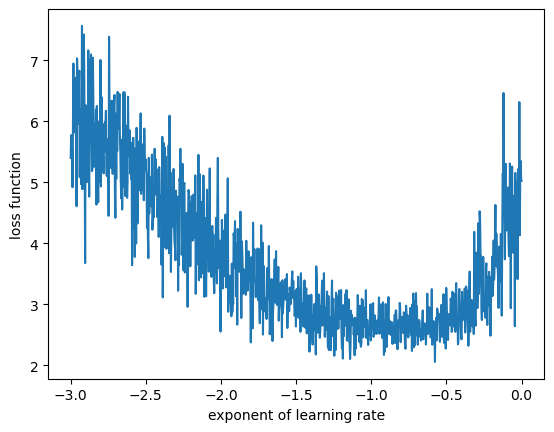

In [89]:
plt.plot(lri,lossi)
plt.xlabel("exponent of learning rate")
plt.ylabel("loss function")
plt.show()

* so -1 is fearly the good learning rate.

# Train/Val:

* training split (train parameters), dev/validation split (train the hyperparameters), test split (evaluate the performance of the model at the end)
* 80%, 10%, 10%
* we test barely since if you always test each time then your model learn from it then we have the overfitting model.

In [90]:
# build the data set(here we define the function instead of loop)

def build_dataset(words):
    block_size=3 # context lenght: how many chars do we take to predict the next one?
    X,Y=[],[]
    for w in words:

    #print(w)
        context=[0]* block_size
        for ch in w + '.':
            ix= stoi[ch]
            X.append(context)
            Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:]+[ix] #crop and append
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y


import random
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words)) 

Xtr,Ytr= build_dataset(words[:n1])
Xdev,Ydev= build_dataset(words[n1:n2])
Xte,Yte=build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [96]:
g= torch.Generator().manual_seed(12334) # for reproduciblity
C= torch.randn((27,2), generator=g)
W1= torch.randn((6,100), generator=g)
b1= torch.randn((1,100), generator=g)
W2= torch.randn((100,27), generator=g)
b2= torch.randn((1,27), generator=g)
parameters = [C,W1,b1,W2,b2]

In [97]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [98]:
for p in parameters:
    p.requires_grad=True

In [99]:
lri=[]
lossi=[]

for i in range(1000):
    
    #minibatch construct
    ix= torch.randint(0,Xtr.shape[0],(32,))
    
    # forward pass
    emb = C[Xtr[ix]] #(32,3,2)
    h = torch.tanh(emb.view(-1,6)@W1+b1) # (32,100)
    logits = h@W2+b2 #(32,27)
    loss=F.cross_entropy(logits,Ytr[ix])
    #print(loss.item())
    # backward pass
    for p in parameters:
        p.grad=None #or zero in pytorch
    loss.backward()
    
    #update
    #lr=lrs[i]
    lr=0.1
    for p in parameters:
        p.data+=-lr*p.grad

    # track stats
    #lri.append(lre[i]) 
    #lossi.append(loss.item())

In [100]:
print(loss.item())

2.4607434272766113


In [102]:
emb = C[Xtr] #(32,3,2)
h = torch.tanh(emb.view(-1,6)@W1+b1) # (32,100)
logits = h@W2+b2 #(32,27)
loss=F.cross_entropy(logits,Ytr)
loss

tensor(2.6217, grad_fn=<NllLossBackward0>)

In [101]:
emb = C[Xdev] #(32,3,2)
h = torch.tanh(emb.view(-1,6)@W1+b1) # (32,100)
logits = h@W2+b2 #(32,27)
loss=F.cross_entropy(logits,Ydev)
loss

tensor(2.6072, grad_fn=<NllLossBackward0>)

# increasing the neurons:

* the model is not powerful enough to say that we have the overfitting! somehow we can say that it's underfitting since these are somehow equal and the model could not learn and memorise anything. So let to grow the neural network!

In [103]:
# here we change the 100 to 300 to increase the layers of neoruns.
g= torch.Generator().manual_seed(12334) # for reproduciblity
C= torch.randn((27,2), generator=g)
W1= torch.randn((6,300), generator=g)
b1= torch.randn((1,300), generator=g)
W2= torch.randn((300,27), generator=g)
b2= torch.randn((1,27), generator=g)
parameters = [C,W1,b1,W2,b2]

In [105]:
sum(p.nelement() for p in parameters)

10281

In [106]:
Xtr.shape, Ytr.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [107]:
for p in parameters:
    p.requires_grad=True

In [118]:
lri=[]
lossi=[]
stepi=[]
for i in range(3000):
    
    #minibatch construct
    ix= torch.randint(0,Xtr.shape[0],(32,))
    
    # forward pass
    emb = C[Xtr[ix]] #(32,3,2)
    h = torch.tanh(emb.view(-1,6)@W1+b1) # (32,100)
    logits = h@W2+b2 #(32,27)
    loss=F.cross_entropy(logits,Ytr[ix])
    #print(loss.item())
    # backward pass
    for p in parameters:
        p.grad=None #or zero in pytorch
    loss.backward()
    
    #update
    #lr=lrs[i]
    lr=0.1
    for p in parameters:
        p.data+=-lr*p.grad

    # track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.item())

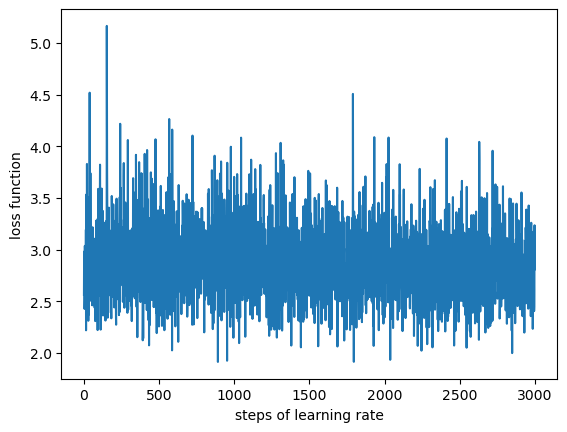

In [112]:
plt.plot(stepi,lossi)
plt.xlabel("steps of learning rate")
plt.ylabel("loss function")
plt.show() 

1. because of the small batches we have alot of noises like back and forth grad, if we have larger we have more smooth graph.
2. having the large dataset(training set) makes better optimization
3. since embeddings are goes to 2 dimentions it crams all parameters into 2 dimentions so it puts the model in the bottleneck.

In [119]:
emb = C[Xtr] #(32,3,2)
h = torch.tanh(emb.view(-1,6)@W1+b1) # (32,100)
logits = h@W2+b2 #(32,27)
loss=F.cross_entropy(logits,Ytr)
loss

tensor(2.8047, grad_fn=<NllLossBackward0>)

In [120]:
emb = C[Xdev] #(32,3,2)
h = torch.tanh(emb.view(-1,6)@W1+b1) # (32,100)
logits = h@W2+b2 #(32,27)
loss=F.cross_entropy(logits,Ydev)
loss

tensor(2.8002, grad_fn=<NllLossBackward0>)

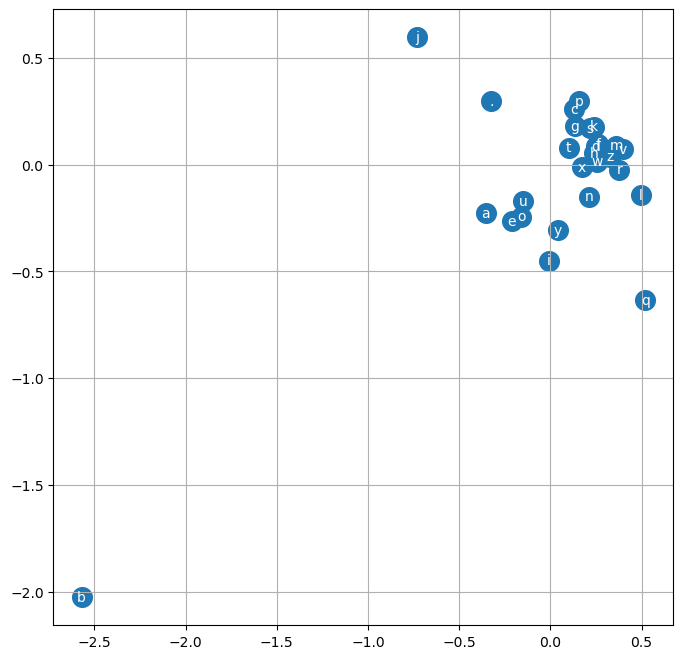

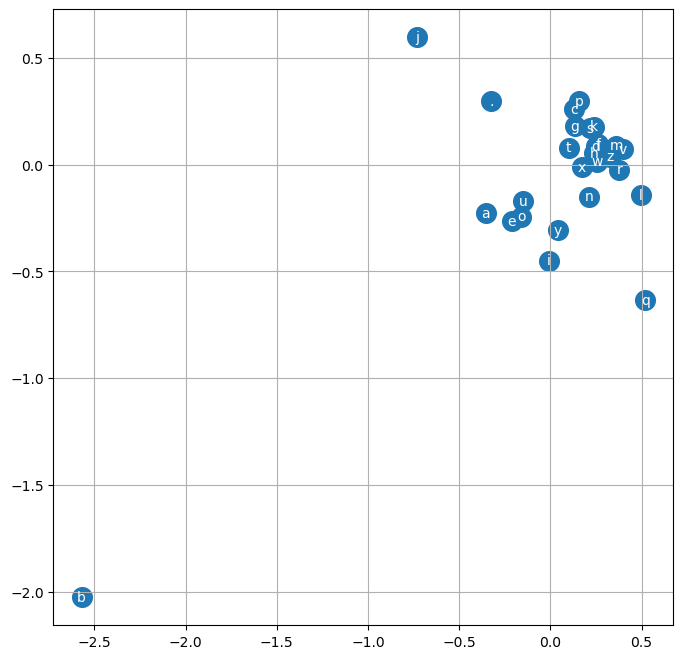

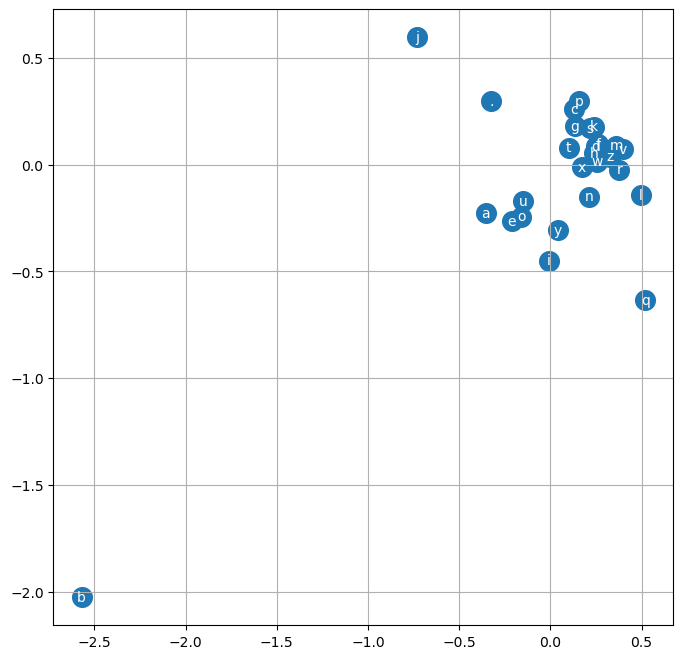

In [136]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha='center', va='center', color='white')
plt.grid('minor')
plt.show()

# increasing the possibility of embeddings dimention:

In [137]:
# change 2 to 10
# we just decrease the number of hidden layers
# 6 turns to 30 cuz of 10*3
g= torch.Generator().manual_seed(12334) # for reproduciblity
C= torch.randn((27,10), generator=g)
W1= torch.randn((30,200), generator=g)
b1= torch.randn((1,200), generator=g)
W2= torch.randn((200,27), generator=g)
b2= torch.randn((1,27), generator=g)
parameters = [C,W1,b1,W2,b2]

In [140]:
sum(p.nelement() for p in parameters)

11897

In [141]:
for p in parameters:
    p.requires_grad=True

In [142]:
lri=[]
lossi=[]
stepi=[]

In [152]:
for i in range(50000):
    
    #minibatch construct
    ix= torch.randint(0,Xtr.shape[0],(32,))
    
    # forward pass
    emb = C[Xtr[ix]] #(32,3,2)
    h = torch.tanh(emb.view(-1,30)@W1+b1) # (32,100)
    logits = h@W2+b2 #(32,27)
    loss=F.cross_entropy(logits,Ytr[ix])
    #print(loss.item())
    # backward pass
    for p in parameters:
        p.grad=None #or zero in pytorch
    loss.backward()
    
    #update
    #lr=lrs[i]
    lr=0.01
    for p in parameters:
        p.data+=-lr*p.grad

    # track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

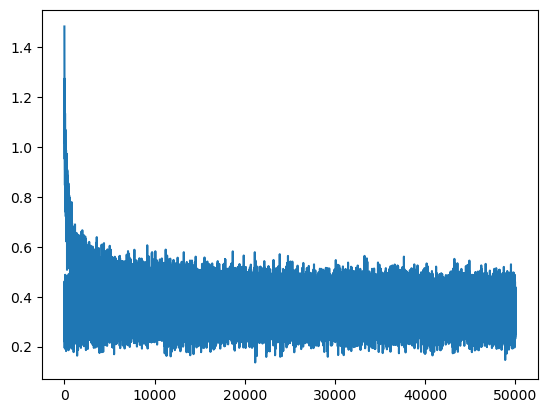

In [153]:
plt.plot(stepi,lossi)
plt.show()

In [154]:
emb = C[Xtr] #(32,3,2)
h = torch.tanh(emb.view(-1,30)@W1+b1) # (32,100)
logits = h@W2+b2 #(32,27)
loss=F.cross_entropy(logits,Ytr)
loss

tensor(2.1852, grad_fn=<NllLossBackward0>)

In [155]:
emb = C[Xdev] #(32,3,2)
h = torch.tanh(emb.view(-1,30)@W1+b1) # (32,100)
logits = h@W2+b2 #(32,27)
loss=F.cross_entropy(logits,Ydev)
loss

tensor(2.2230, grad_fn=<NllLossBackward0>)

In [166]:
# sample from the model
g = torch.Generator().manual_seed(2147483647)

for _ in range(1):

    out=[]
    context=[0]*block_size #initial with all
    while True:
        emb=C[torch.tensor([context])] #(1,block_size,d)
        print(emb)
        h = torch.tanh(emb.view(1,-1)@ W1+b1)
        print(h)
        logits= h@W2+b2
        print(logits)
        probs= F.softmax(logits, dim=1)
        print(probs)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        print(ix)
        context=context[1:]+[ix]
        print(context)
        out.append(ix)
        if ix==0:
            break
    print(''.join(itos[i] for i in out))     

tensor([[[-0.9459,  0.2387, -1.4464,  1.5716, -3.8015, -1.4923,  0.2482,
          -0.7157,  0.6941,  0.9933],
         [-0.9459,  0.2387, -1.4464,  1.5716, -3.8015, -1.4923,  0.2482,
          -0.7157,  0.6941,  0.9933],
         [-0.9459,  0.2387, -1.4464,  1.5716, -3.8015, -1.4923,  0.2482,
          -0.7157,  0.6941,  0.9933]]], grad_fn=<IndexBackward0>)
tensor([[-1.0000, -1.0000, -1.0000,  1.0000, -1.0000, -1.0000,  1.0000,  0.9993,
          1.0000,  1.0000, -1.0000, -1.0000, -0.9827,  0.9980,  0.9916, -1.0000,
         -1.0000, -1.0000,  1.0000, -1.0000,  1.0000, -0.9983,  0.9975,  0.9991,
         -1.0000, -0.9999,  1.0000,  1.0000, -0.9979,  1.0000, -0.9923,  1.0000,
         -0.9936, -1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  0.9923,  1.0000,
         -1.0000,  1.0000,  0.9929,  0.9999, -1.0000, -0.9974,  1.0000,  0.9399,
          1.0000, -1.0000, -1.0000, -1.0000,  1.0000,  1.0000, -0.9995,  0.9992,
          0.9808, -1.0000,  1.0000, -1.0000, -0.9897, -0.9993, -0.9988, 